# Exercise 10 (module 12)
Hao-Tien Kuo

In [35]:
# We will be using the clusterData.csv dataset. This data has been created with 6 clusters, 4 blobs and 2 concentric circles.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('clusterData.csv')

In [36]:
df

,x,y
0,0.539747,-0.074340
1,-0.748366,0.499009
2,2.602590,0.726548
3,2.156531,1.427136
4,1.402052,-1.964871
...,...,...
1135,-6.164682,-5.015899
1136,0.599753,-2.005821
1137,8.497472,5.390017
1138,-3.044420,-4.584089


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1140 non-null   float64
 1   y       1140 non-null   float64
dtypes: float64(2)
memory usage: 17.9 KB


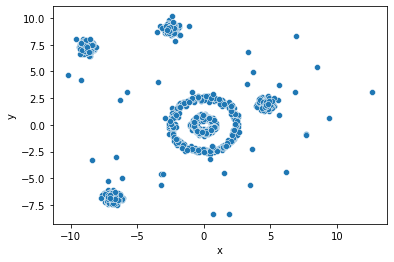

In [38]:
sns.scatterplot(data=df, x='x', y='y')

plt.show()

## K-Means
For k-means we have to provide the number of clusters in the data. We will loop through a range of clusters and determine the optimal number of clusters. Two techniques for doing this are the sum-of- squared-errors between each data point and the center of its assigned clusters, or the silhouette coefficient which takes into account the distance within the cluster and the distance to other cluster. For the purposes of this we will use silhouette.

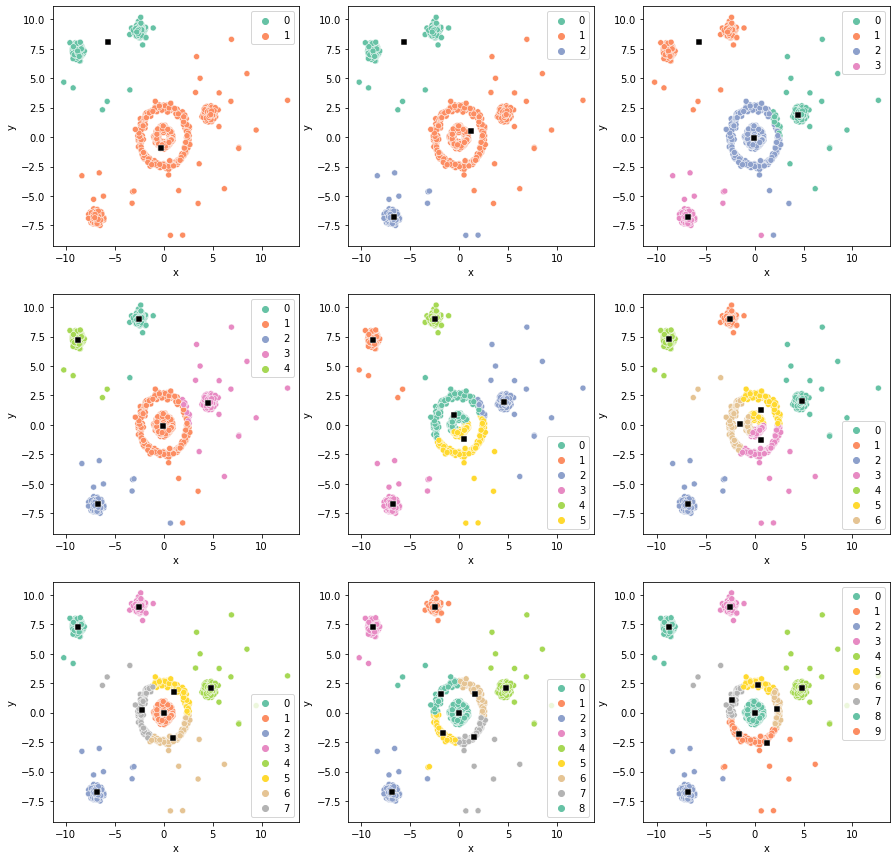

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

fig, axs = plt.subplots(3, 3, figsize = (15, 15))
range_n_clusters = range(2,11)
dict_silhouette = {}

for i in range_n_clusters:
    kmeans_i = KMeans(n_clusters=i, random_state=0).fit(df[['x','y']])
    df['pred_{}'.format(i)] = kmeans_i.predict(df[['x','y']])
    dict_silhouette[i] = silhouette_score(df[['x','y']], df['pred_{}'.format(i)])
    
    sns.scatterplot(data=df, x='x', y='y', hue='pred_{}'.format(i), ax = axs[(i-2)//3,(i-2)%3], palette='Set2')
    sns.scatterplot(data=pd.DataFrame(kmeans_i.cluster_centers_, columns = ['x','y']), x='x', y='y', ax = axs[(i-2)//3,(i-2)%3], color='black', marker='s')

plt.show()

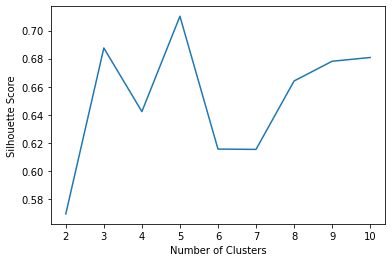

In [52]:
# Plot silhouette score vs number of clusters (try 2-10)

sns.lineplot(data=dict_silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.show()

# Based on the plot, how many clusters do you recommend?

# Silhouette scores near +1 indicate that the sample is far away from the neighboring clusters. 
# A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters 
# and negative values indicate that those samples might have been assigned to the wrong cluster.

# I would choose cluster of 5 with K-means since it generates the highest silhouette score.

For n_clusters = 5 The average silhouette_score is : 0.7102733271941283


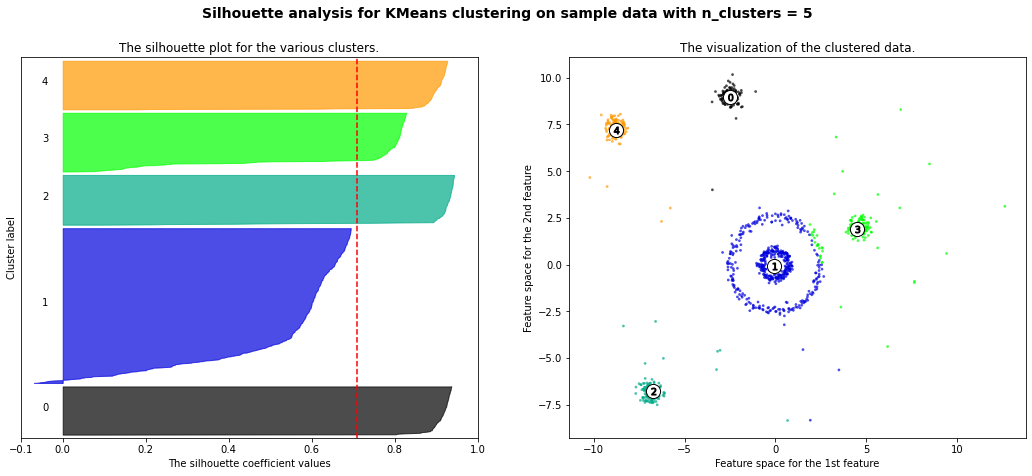

In [54]:
# Plot the data with the optimal number of clusters, using the cluster label as the color code.

X = df[['x','y']].to_numpy()

for n_clusters in [5]:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# Although 5 clusters is optimal, cluster number 1 (blue) seems problematic. 
# Cluster 1 has a silhouette score below average, and its size is relatively large, suggesting that it can be further divided. 
# However, K-means could not do it properly, because cluster 1 contains concentric circles, 
# and the boundaries between k-means clusters can only be linear.

## DBScan
DBSCAN is a density based clustering algorithm. Unlike K-means we do not choose the number of clusters, instead we choose epsilon (the distance between points to consider) and min samples (the number of points to be considered a center). One difference from K-means is that not every point needs to be assigned to a cluster, some points can be considered noise. Additionally, we saw that K-Means has trouble with concentric circles (or clusters that surround another cluster).

In [98]:
# Fit the data with DBScan. 
# Choose an appropriate values of eps and min_samples to fit the data, 
# you can use your knowledge of the distributions and standard deviations to make an informed decision. 
# Dont make epsilon too large, the score will increase but you wont get the concentric circles which we know to be separate.

from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.5, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))

Estimated number of clusters: 6
Estimated number of noise points: 32
Silhouette Coefficient: 0.557


How many clusters did you create?

- 6 clusters

What is the silhouette score?

- 0.557

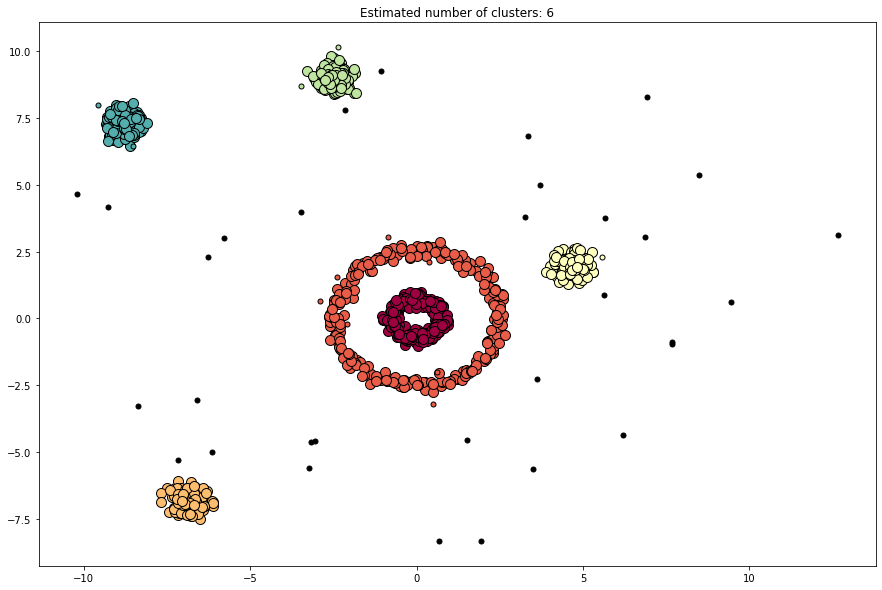

In [99]:
# Plot the data with using the cluster label as the color code.

fig = plt.figure(figsize =(15, 10))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=5,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

# Using epsilon of 0.5, we are able to differentiate between the inner circle and the outer circle, 
# while avoiding further separation of the outer circle. 